# Chapter 5. Product analytics

## 5.1 The importance of product analytics

Product analytics is a way to draw insights from data on how customers engage and interact with products offered, how different products perform, and what some of the observable weaknesses and strengths in a business are. However, product analytics does not just stop at analyzing the data. The ultimate goal of product analytics is really to build actionable insights and reports that can further help optimize and improve product performance and generate new marketing or product ideas based on the findings of product analytics.

Product analytics starts by tracking events. These events can be customer website visits, page views, browser histories, purchases, or any other actions that customers can take with the products that you offer. Then, you can start analyzing and visualizing any observable patterns in these events with the goal of creating actionable insights or reports

**Improve customer and product retention**: By analyzing what customers viewed and purchased, you can identify what items customers repeatedly purchase and who those repeat customers are. On the other hand, you can also identify what items customers do not buy and the customers who are at risk of churning. Analyzing and understanding the common attributes of the repeatedly purchased items and repeat customers can help you improve your retention strategy

**Identify popular and trending products**: As a marketer for retail businesses, it is important to have a good understanding of popular and trending products. These best-selling products are key revenue drivers for the business and provide new selling opportunities, such as crosssells or bundle sales. With product analytics, you should be able to identify and track these popular and trending products easily and generate new strategies to explore different opportunities using these best-selling products.

**Segment customers and products based on their key attributes**: With the customer profile and product data, you can segment your customer base and products based on their attributes using product analytics. Some of the ways to segment your product data are based on their profitability, volumes of sales, volumes of reorders, and numbers of refunds. With these segmentations, you can draw actionable insights on which product or customer segments to target next

**Develop marketing strategies with higher ROI**: Product analytics can also be used to analyze the return on investment (ROI) of your marketing strategies. By analyzing the marketing dollars spent on promoting certain items and the revenue generated from those products, you can understand what works and what does not. Using product analytics for marketing ROI analyses can help you create more efficient marketing strategies.

## 5.2 Product analytics using python

In [4]:
%matplotlib inline 

import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel(io = '/Users/boyuan/Desktop/OneDrive/Hands on data science for martketing/Online Retail.xlsx', sheet_name = 'Online Retail')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df)
profile.to_widgets()

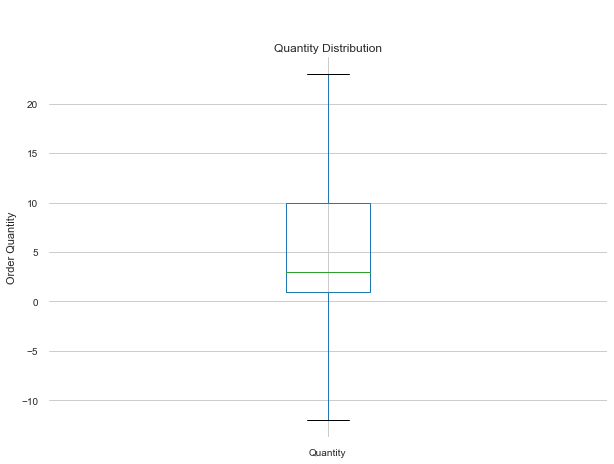

In [6]:
ax = df['Quantity'].plot.box(
    showfliers = False,
    grid = True,
    figsize = (10, 7)
)
ax.set_ylabel('Order Quantity')
ax.set_title('Quantity Distribution')
plt.suptitle(' ')
plt.show()

In [7]:
df = df.loc[df['Quantity'] > 0]

### Time series trends

In [9]:
monthly_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()
monthly_orders_df

InvoiceDate
2010-12-31    1629
2011-01-31    1120
2011-02-28    1126
2011-03-31    1531
2011-04-30    1318
2011-05-31    1731
2011-06-30    1576
2011-07-31    1540
2011-08-31    1409
2011-09-30    1896
2011-10-31    2129
2011-11-30    2884
2011-12-31     839
Freq: M, Name: InvoiceNo, dtype: int64

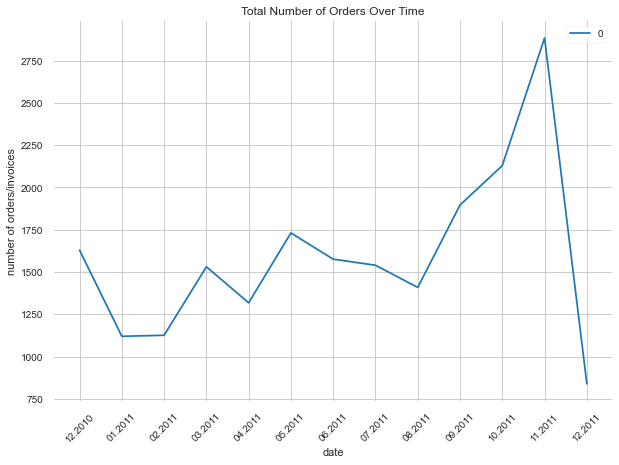

In [10]:
ax = pd.DataFrame(monthly_orders_df.values).plot(
    grid = True,
    figsize = (10, 7),
    legend = True
)
ax.set_xlabel('date')
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')

plt.xticks(
    range(len(monthly_orders_df.index)),
    [x.strftime('%m.%Y') for x in monthly_orders_df.index],
    rotation = 45
)
plt.show()

In [11]:
invoice_dates = df.loc[
    df['InvoiceDate'] >= '2011-12-01', 'InvoiceDate'
]
print('Min date: %s\nMax date: %s' % (invoice_dates.min(), invoice_dates.max()))

Min date: 2011-12-01 08:33:00
Max date: 2011-12-09 12:50:00


In [12]:
df = df.loc[df['InvoiceDate'] < '2011-12-01']

In [15]:
df['Sales'] = df['Quantity'] * df['UnitPrice']
monthly_revenue_df = df.set_index('InvoiceDate')['Sales'].resample('M').sum()
monthly_revenue_df

InvoiceDate
2010-12-31     823746.140
2011-01-31     691364.560
2011-02-28     523631.890
2011-03-31     717639.360
2011-04-30     537808.621
2011-05-31     770536.020
2011-06-30     761739.900
2011-07-31     719221.191
2011-08-31     737014.260
2011-09-30    1058590.172
2011-10-31    1154979.300
2011-11-30    1509496.330
Freq: M, Name: Sales, dtype: float64

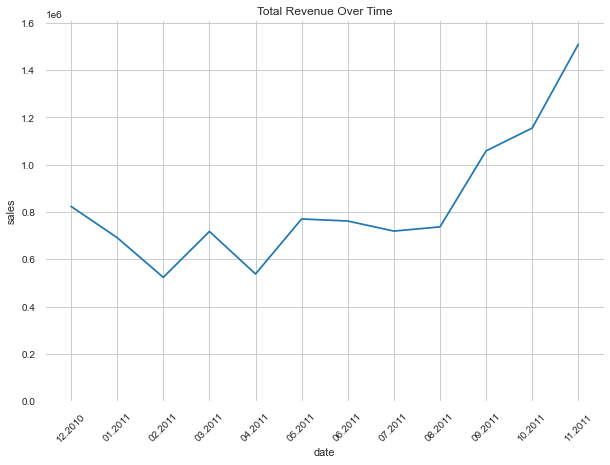

In [16]:
ax = pd.DataFrame(monthly_revenue_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)
ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue Over Time')

ax.set_ylim([0, max(monthly_revenue_df.values)+100000])

plt.xticks(
    range(len(monthly_revenue_df.index)),
    [x.strftime('%m.%Y') for x in monthly_revenue_df.index],
    rotation=45
)
plt.show()

### Repeat customers

The number of monthly repeat purchases, this means a customer placed more than one order within a given month

In [17]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [18]:
invoice_customer_df = df.groupby(
    by = ['InvoiceNo', 'InvoiceDate']
).agg({
    'Sales': sum,
    'CustomerID': max,
    'Country': max
}).reset_index()
invoice_customer_df.head()

,InvoiceNo,InvoiceDate,Sales,CustomerID,Country
0,536365,2010-12-01 08:26:00,139.12,17850.0,United Kingdom
1,536366,2010-12-01 08:28:00,22.20,17850.0,United Kingdom
2,536367,2010-12-01 08:34:00,278.73,13047.0,United Kingdom
3,536368,2010-12-01 08:34:00,70.05,13047.0,United Kingdom
4,536369,2010-12-01 08:35:00,17.85,13047.0,United Kingdom


In [19]:
monthly_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq = 'M'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']
monthly_repeat_customers_df

InvoiceDate
2010-12-31    263
2011-01-31    153
2011-02-28    153
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    541
Freq: M, Name: CustomerID, dtype: int64

In [20]:
monthly_unique_customers_df = df.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()
monthly_unique_customers_df

InvoiceDate
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1665
Freq: M, Name: CustomerID, dtype: int64

In [21]:
monthly_repeat_percentage = monthly_repeat_customers_df / monthly_unique_customers_df * 100.0
monthly_repeat_percentage

InvoiceDate
2010-12-31    29.717514
2011-01-31    20.647773
2011-02-28    20.184697
2011-03-31    20.841889
2011-04-30    19.859813
2011-05-31    26.609848
2011-06-30    22.199798
2011-07-31    23.919916
2011-08-31    21.176471
2011-09-30    21.484992
2011-10-31    23.753666
2011-11-30    32.492492
Freq: M, Name: CustomerID, dtype: float64

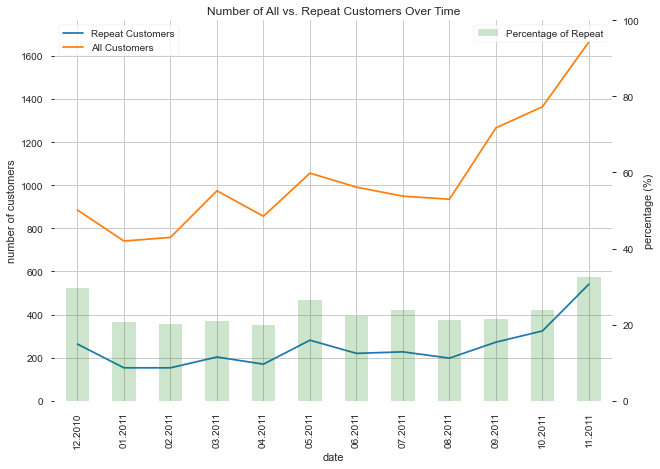

In [23]:
ax = pd.DataFrame(monthly_repeat_customers_df.values).plot(
    figsize=(10,7)
)
pd.DataFrame(monthly_unique_customers_df.values).plot(
    ax=ax,
    grid=True
)
ax2 = pd.DataFrame(monthly_repeat_percentage.values).plot.bar(
    ax=ax,
    grid=True,
    secondary_y=True,
    color='green',
    alpha=0.2
)
ax.set_xlabel('date')
ax.set_ylabel('number of customers')
ax.set_title('Number of All vs. Repeat Customers Over Time')

ax2.set_ylabel('percentage (%)')
ax.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of Repeat'], loc='upper right')
ax.set_ylim([0, monthly_unique_customers_df.values.max()+100])
ax2.set_ylim([0, 100])

plt.xticks(
    range(len(monthly_repeat_customers_df.index)),
    [x.strftime('%m.%Y') for x in monthly_repeat_customers_df.index],
    rotation=45
)
plt.show()

In [24]:
monthly_rev_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq = 'M'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M').sum()['Sales']
monthly_rev_perc_repeat_customers_df = monthly_rev_repeat_customers_df / monthly_revenue_df * 100.0
monthly_rev_perc_repeat_customers_df

InvoiceDate
2010-12-31    43.602098
2011-01-31    32.128346
2011-02-28    36.519810
2011-03-31    37.259729
2011-04-30    36.346420
2011-05-31    49.082331
2011-06-30    49.401017
2011-07-31    44.141497
2011-08-31    43.029595
2011-09-30    47.295296
2011-10-31    49.698455
2011-11-30    47.285696
Freq: M, Name: Sales, dtype: float64

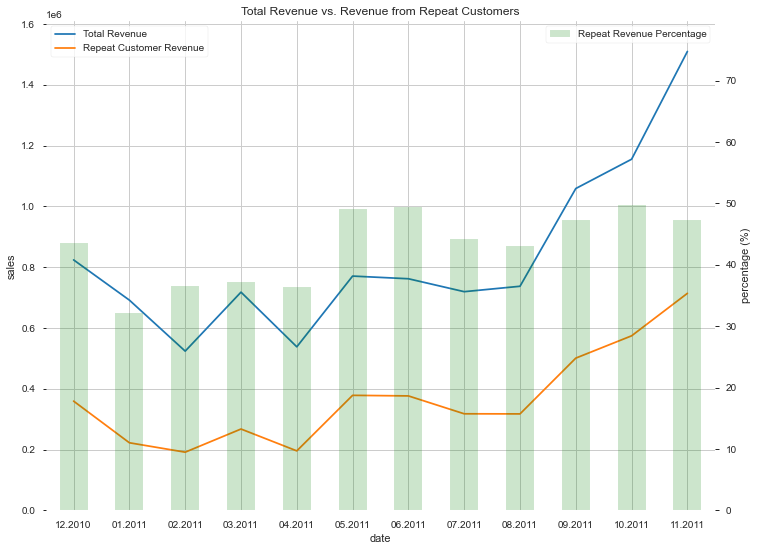

In [25]:
ax = pd.DataFrame(monthly_revenue_df.values).plot(figsize=(12,9))
pd.DataFrame(monthly_rev_repeat_customers_df.values).plot(
    ax=ax,
    grid=True,
)
ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue vs. Revenue from Repeat Customers')
ax.legend(['Total Revenue', 'Repeat Customer Revenue'])
ax.set_ylim([0, max(monthly_revenue_df.values)+100000])
ax2 = ax.twinx()
pd.DataFrame(monthly_rev_perc_repeat_customers_df.values).plot(
    ax=ax2,
    kind='bar',
    color='g',
    alpha=0.2
)
ax2.set_ylim([0, max(monthly_rev_perc_repeat_customers_df.values)+30])
ax2.set_ylabel('percentage (%)')
ax2.legend(['Repeat Revenue Percentage'])
ax2.set_xticklabels([
    x.strftime('%m.%Y') for x in monthly_rev_perc_repeat_customers_df.index
])
plt.show()

Roughly half of the revenue was driven by the 20-30% of the customer base who are repeat customers. This shows how important it is to retain existing customers.

### Trending items over time

In [27]:
date_item_df = df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq = 'M'), 'StockCode'
])['Quantity'].sum()
date_item_df

InvoiceDate  StockCode
2010-12-31   10002         251
             10120          16
             10125         154
             10133         130
             10135         411
                          ... 
2011-11-30   C2            173
             DCGSSGIRL       1
             DOT            47
             M            3894
             POST         1262
Name: Quantity, Length: 31701, dtype: int64

In [33]:
# Rank items by the last month sales
last_month_sorted_df = pd.DataFrame(date_item_df.loc['2011-11-30']).sort_values(
    by='Quantity', ascending=False
).reset_index()
last_month_sorted_df

,InvoiceDate,StockCode,Quantity
0,2011-11-30,23084,14954
1,2011-11-30,84826,12551
2,2011-11-30,22197,12460
3,2011-11-30,22086,7908
4,2011-11-30,85099B,5909
...,...,...,...
2941,2011-11-30,84549,1
2942,2011-11-30,84527,1
2943,2011-11-30,90082B,1
2944,2011-11-30,90082D,1


In [35]:
date_item_df = df.loc[
    df['StockCode'].isin([23084, 84826, 22197, 22086, '85099B'])
].set_index('InvoiceDate').groupby([
    pd.Grouper(freq = 'M'), 'StockCode'
])['Quantity'].sum()
date_item_df

InvoiceDate  StockCode
2010-12-31   22086         2460
             22197         2738
             84826          366
             85099B        2152
2011-01-31   22086           24
             22197         1824
             84826          480
             85099B        2747
2011-02-28   22086            5
             22197         2666
             84826           66
             85099B        3080
2011-03-31   22086           87
             22197         2803
             84826           60
             85099B        5282
2011-04-30   22086           13
             22197         1869
             84826            1
             85099B        2456
2011-05-31   22086           17
             22197         6849
             23084         1131
             85099B        3621
2011-06-30   22086          344
             22197         2095
             23084         1713
             84826            4
             85099B        3682
2011-07-31   22086          383
             2219

In [37]:
trending_items_df = date_item_df.reset_index().pivot('InvoiceDate', 'StockCode').fillna(0)
trending_items_df = trending_items_df.reset_index()
trending_items_df = trending_items_df.set_index('InvoiceDate')
trending_items_df.columns = trending_items_df.columns.droplevel(0)
trending_items_df

StockCode,22086,22197,23084,84826,85099B
InvoiceDate,,,,,
2010-12-31,2460.0,2738.0,0.0,366.0,2152.0
2011-01-31,24.0,1824.0,0.0,480.0,2747.0
2011-02-28,5.0,2666.0,0.0,66.0,3080.0
2011-03-31,87.0,2803.0,0.0,60.0,5282.0
2011-04-30,13.0,1869.0,0.0,1.0,2456.0
2011-05-31,17.0,6849.0,1131.0,0.0,3621.0
2011-06-30,344.0,2095.0,1713.0,4.0,3682.0
2011-07-31,383.0,1876.0,318.0,2.0,3129.0
2011-08-31,490.0,5421.0,2267.0,72.0,5502.0


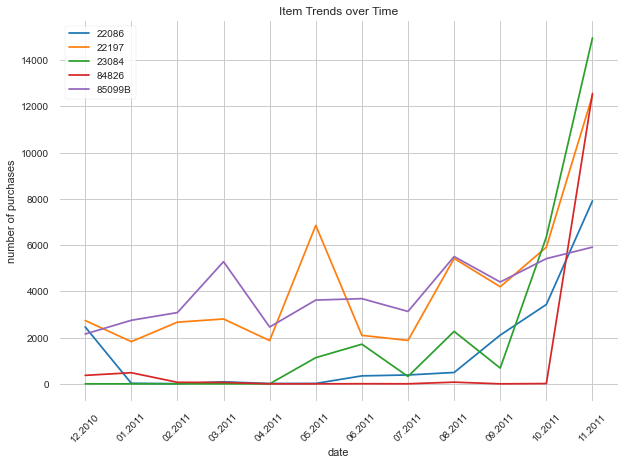

In [41]:
ax = pd.DataFrame(trending_items_df.values).plot(
    figsize=(10,7),
    grid=True,
)
ax.set_ylabel('number of purchases')
ax.set_xlabel('date')
ax.set_title('Item Trends over Time')
ax.legend(trending_items_df.columns, loc='upper left')

plt.xticks(
    range(len(trending_items_df.index)),
    [x.strftime('%m.%Y') for x in trending_items_df.index],
    rotation=45
)
plt.show()

Analyzing the trends and changes in the popularity of products not only helps you understand what your customers like and purchase the most, but also helps you tailor your marketing messages. For example, you can recommend these items with rising popularity in your marketing emails, calls, or advertisements to improve customer engagement. As it has been shown that your customers are more interested and more likely to purchase these items, you might get higher marketing engagement from your customers when you market these items more and you might eventually get higher conversion rates when you target your customers with these trending items. Using these popular and trending items is one way to build a product recommendation engine

## 5.3 Product analytics using r